EDA of Conflict Data

In [4]:
# !pip install geopandas
# !pip install Shapely
# !pip install matplotlib

In [2]:
# General imports
import pandas as pd
from pandas_profiling import ProfileReport
import os # accessing directory structure

# Plotting imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt # plotting
import numpy as np 
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import plotly.express as px


In [28]:
# Confihuration setting
data_dir = "https://raw.githubusercontent.com/tejaswinidhupad/Child-Wasting-Prediction/main/data/ZHL/1900-01-01-2022-09-27-Eastern_Africa-Somalia.csv"

# For pandas
pd.options.display.max_columns = 200 # display upto 200 columns (instead of default 20)
pd.options.display.max_rows = 200 # display upto 200 rows (instead of default 60)

In [29]:
# Read data
conflict_df = pd.read_csv(data_dir)

In [30]:
conflict_df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9499027,706,SOM38074,38074,23 September 2022,2022,1,Explosions/Remote violence,Shelling/artillery/missile attack,Al Shabaab,NaN,2,ATMIS: African Union Transition Mission in Som...,NaN,8,28,Eastern Africa,Somalia,Lower Juba,Kismaayo,NaN,Abdale Birole,-0.4906,42.1969,1,Calamada; Al Furqaan,National,"On 23 September 2022, Al Shabaab militants fir...",0,1664231916,SOM
1,9499028,706,SOM38075,38075,23 September 2022,2022,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2022-),NaN,1,12,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Almada,2.2187,45.2087,1,Al Furqaan; Calamada,National,"On 23 September 2022, overnight, Al Shabaab mi...",0,1664231916,SOM
2,9499029,706,SOM38076,38076,23 September 2022,2022,1,Battles,Armed clash,Al Shabaab,NaN,2,ATMIS: African Union Transition Mission in Som...,NaN,8,28,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Awbocow,1.9850,45.0018,1,Al Furqaan; Calamada,National,"On 23 September 2022, overnight, Al Shabaab mi...",0,1664231916,SOM
3,9499030,706,SOM38077,38077,23 September 2022,2022,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2022-),NaN,1,12,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Lafoole,2.0833,45.1667,1,Calamada; Al Furqaan,National,"On 23 September 2022, overnight, Al Shabaab mi...",0,1664231916,SOM
4,9499189,706,SOM38009,38009,23 September 2022,2022,1,Explosions/Remote violence,Air/drone strike,Military Forces of the United States (2021-),Military Forces of Somalia (2022-) Special Forces,8,Al Shabaab,NaN,2,28,Eastern Africa,Somalia,Galgaduud,Ceel Buur,NaN,Ceel Buur,4.6815,46.6234,2,Radio Kulmiye,National,"On 23 September 2022, US forces in coordinatio...",0,1664231916,SOM


In [31]:
# # violence in district Marka in 2021
# the data is different from the csv shared to us
# conflict_df[(conflict_df['year']==2021) & (conflict_df['admin2']== 'Marka')].head()

In [32]:
# conflict_df['day'],conflict_df['month'],conflict_df['year'] = conflict_df['event_date'].apply(lambda x:x.split(' '))
day = []
month = []
year = []
for i,row in conflict_df.iterrows():
    ed = row['event_date'].split()
    day.append(ed[0])
    month.append(ed[1])
    year.append(ed[2])
    

In [33]:
conflict_df['day'] = day
conflict_df['month'] = month

In [43]:
Marka_ds = conflict_df[(conflict_df['year']==2021) & (conflict_df['admin2']== 'Afgooye')]
Marka_ds.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,day,month
2293,8705560,706,SOM35772,35772,31 December 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,2,AMISOM: African Union Mission in Somalia (2007...,NaN,8,28,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Awbocow,1.9850,45.0018,1,Calamada,National,"On 31 December 2021, Al Shabaab militants carr...",0,1641863885,SOM,31,December
2294,8705561,706,SOM35778,35778,31 December 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,2,AMISOM: African Union Mission in Somalia (2007...,NaN,8,28,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,K60,1.9243,44.9231,1,Calamada,National,"On 31 December 2021, Al Shabaab militants carr...",0,1641863885,SOM,31,December
2295,8705562,706,SOM35780,35780,31 December 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,2,AMISOM: African Union Mission in Somalia (2007...,NaN,8,28,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Laantabuur,2.0537,45.0548,1,Calamada,National,"On 31 December 2021, Al Shabaab militants carr...",0,1641863885,SOM,31,December
2311,9291539,706,SOM35770,35770,30 December 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2017-2022),NaN,1,12,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,Siinka Dheer,2.0721,45.2231,1,Undisclosed Source,Local partner-Other,"On 30 December 2021, Al Shabaab militants carr...",0,1653348316,SOM,30,December
2320,9291107,706,SOM35760,35760,29 December 2021,2021,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2017-2022),NaN,1,12,Eastern Africa,Somalia,Lower Shabelle,Afgooye,NaN,K50,2.0054,44.9872,1,Undisclosed Source,Local partner-Other,"On 29 December 2021, Al Shabaab militants carr...",0,1653348314,SOM,29,December


In [44]:
Marka_ds.groupby('month').count()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,day
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
April,25,25,25,25,25,25,25,25,25,25,0,25,25,1,25,25,25,25,25,25,0,25,25,25,25,25,25,25,25,25,25,25
August,22,22,22,22,22,22,22,22,22,22,0,22,22,1,22,22,22,22,22,22,0,22,22,22,22,22,22,22,22,22,22,22
December,47,47,47,47,47,47,47,47,47,47,0,47,47,0,47,47,47,47,47,47,0,47,47,47,47,47,47,47,47,47,47,47
February,35,35,35,35,35,35,35,35,35,35,1,35,35,3,35,35,35,35,35,35,0,35,35,35,35,35,35,35,35,35,35,35
January,35,35,35,35,35,35,35,35,35,35,1,35,35,5,35,35,35,35,35,35,0,35,35,35,35,35,35,35,35,35,35,35
July,25,25,25,25,25,25,25,25,25,25,0,25,25,5,25,25,25,25,25,25,0,25,25,25,25,25,25,25,25,25,25,25
June,26,26,26,26,26,26,26,26,26,26,0,26,26,2,26,26,26,26,26,26,0,26,26,26,26,26,26,26,26,26,26,26
March,21,21,21,21,21,21,21,21,21,21,1,21,21,1,21,21,21,21,21,21,0,21,21,21,21,21,21,21,21,21,21,21
May,27,27,27,27,27,27,27,27,27,27,0,27,27,1,27,27,27,27,27,27,0,27,27,27,27,27,27,27,27,27,27,27


In [19]:
# Basic checks
# print(conflict_df.shape)

In [27]:
conflict_df.describe(include='all')

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
count,3.778200e+04,37782.0,37782,37782.000000,37782,37782.000000,37782.000000,37782,37782,37782,2763,37782.000000,34869,5733,37782.000000,37782.000000,37782,37782,37782,37782,0.0,37782,37782.000000,37782.000000,37782.000000,37782,37782,36057,37782.000000,3.778200e+04,37782
unique,NaN,NaN,37782,NaN,6643,NaN,NaN,6,24,690,330,NaN,574,820,NaN,NaN,1,1,18,74,NaN,1564,NaN,NaN,NaN,1007,23,34975,NaN,NaN,1
top,NaN,NaN,SOM38074,NaN,11 September 2022,NaN,NaN,Battles,Armed clash,Al Shabaab,Military Forces of Somalia (2012-2017),NaN,Civilians (Somalia),Government of Somalia (2017-2022),NaN,NaN,Eastern Africa,Somalia,Banadir,Banadir,NaN,Mogadishu,NaN,NaN,NaN,Undisclosed Source,Local partner-Other,Attack on civilians in Afgooye.,NaN,NaN,SOM
freq,NaN,NaN,1,NaN,29,NaN,NaN,18111,17269,9766,477,NaN,9904,405,NaN,NaN,37782,37782,10859,10859,NaN,1708,NaN,NaN,NaN,24111,25536,13,NaN,NaN,37782
mean,7.556174e+06,706.0,NaN,19037.757107,NaN,2014.899555,1.021730,NaN,NaN,NaN,NaN,2.986396,NaN,NaN,3.545074,25.709650,NaN,NaN,NaN,NaN,NaN,NaN,3.395101,44.994731,1.207109,NaN,NaN,NaN,1.639617,1.610727e+09,NaN
std,1.354291e+06,0.0,NaN,11005.247470,NaN,4.906753,0.167592,NaN,NaN,NaN,NaN,2.124640,NaN,NaN,2.727617,15.089159,NaN,NaN,NaN,NaN,NaN,NaN,2.771458,1.725972,0.478554,NaN,NaN,NaN,5.969353,3.512725e+07,NaN
min,4.559536e+06,706.0,NaN,1.000000,NaN,1997.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.637500,40.993500,1.000000,NaN,NaN,NaN,0.000000,1.552576e+09,NaN
25%,6.150386e+06,706.0,NaN,9516.250000,NaN,2012.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.033300,44.047900,1.000000,NaN,NaN,NaN,0.000000,1.571260e+09,NaN
50%,7.531294e+06,706.0,NaN,19011.500000,NaN,2015.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.150000,45.300300,1.000000,NaN,NaN,NaN,0.000000,1.618571e+09,NaN
75%,9.283244e+06,706.0,NaN,28591.750000,NaN,2019.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,7.000000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.123700,45.390000,1.000000,NaN,NaN,NaN,1.000000,1.653347e+09,NaN


In [12]:
# Dropping the unnecessary columns
df = conflict_df.drop(labels=['data_id','iso','event_id_cnty','event_id_no_cnty','year','region','country','geo_precision','timestamp','iso3'],axis=1)
df.head(2)

,event_date,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,admin1,admin2,admin3,location,latitude,longitude,source,source_scale,notes,fatalities
0,23 September 2022,1,Explosions/Remote violence,Shelling/artillery/missile attack,Al Shabaab,NaN,2,ATMIS: African Union Transition Mission in Som...,NaN,8,28,Lower Juba,Kismaayo,NaN,Abdale Birole,-0.4906,42.1969,Calamada; Al Furqaan,National,"On 23 September 2022, Al Shabaab militants fir...",0
1,23 September 2022,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2022-),NaN,1,12,Lower Shabelle,Afgooye,NaN,Almada,2.2187,45.2087,Al Furqaan; Calamada,National,"On 23 September 2022, overnight, Al Shabaab mi...",0


In [13]:
# Converting the event_date to correct format
date = pd.to_datetime(conflict_df['event_date'])
#print(date)
modified_date_df= df.assign(Date=date)
data = modified_date_df.drop(labels=['event_date'],axis=1)
data.head(2)

,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,admin1,admin2,admin3,location,latitude,longitude,source,source_scale,notes,fatalities,Date
0,1,Explosions/Remote violence,Shelling/artillery/missile attack,Al Shabaab,NaN,2,ATMIS: African Union Transition Mission in Som...,NaN,8,28,Lower Juba,Kismaayo,NaN,Abdale Birole,-0.4906,42.1969,Calamada; Al Furqaan,National,"On 23 September 2022, Al Shabaab militants fir...",0,2022-09-23
1,1,Battles,Armed clash,Al Shabaab,NaN,2,Military Forces of Somalia (2022-),NaN,1,12,Lower Shabelle,Afgooye,NaN,Almada,2.2187,45.2087,Al Furqaan; Calamada,National,"On 23 September 2022, overnight, Al Shabaab mi...",0,2022-09-23


In [14]:
#For checking the unique values in the dataset
data.nunique()

time_precision        3
event_type            6
sub_event_type       24
actor1              690
assoc_actor_1       330
inter1                8
actor2              574
assoc_actor_2       820
inter2                9
interaction          40
admin1               18
admin2               74
admin3                0
location           1564
latitude           1548
longitude          1533
source             1007
source_scale         23
notes             34975
fatalities           72
Date               6643
dtype: int64

In [15]:
#Checking for NUll values in the dataset
data.isnull().sum()

time_precision        0
event_type            0
sub_event_type        0
actor1                0
assoc_actor_1     35019
inter1                0
actor2             2913
assoc_actor_2     32049
inter2                0
interaction           0
admin1                0
admin2                0
admin3            37782
location              0
latitude              0
longitude             0
source                0
source_scale          0
notes              1725
fatalities            0
Date                  0
dtype: int64

Here we can see that assoc_actor_1, assoc_actor_2 and admin3 have a lot of NULL values where : <br>
assoc_actor_1 = The named actor associated with or identifying actor1 <br>
assoc_actor_2 = The named actor associated with or identifying actor2 <br>
admin3 = The third largest sub-national administrative region in which
the event took place

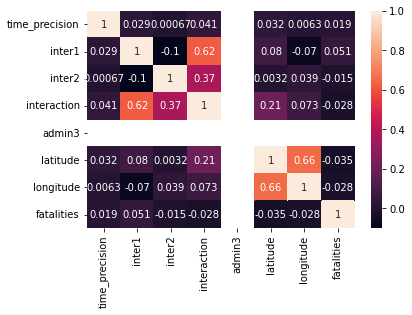

In [16]:
#Plotting the heatmap for correlation matrix
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

Here, <br>
INTER1 = A numeric code indicating the type of ACTOR1 <br>
INTER2 = A numeric code indicating the type of ACTOR2 <br>
INTERACTION =  A numeric code indicating the interaction between types of
ACTOR1 and ACTOR2 <br>


In [17]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

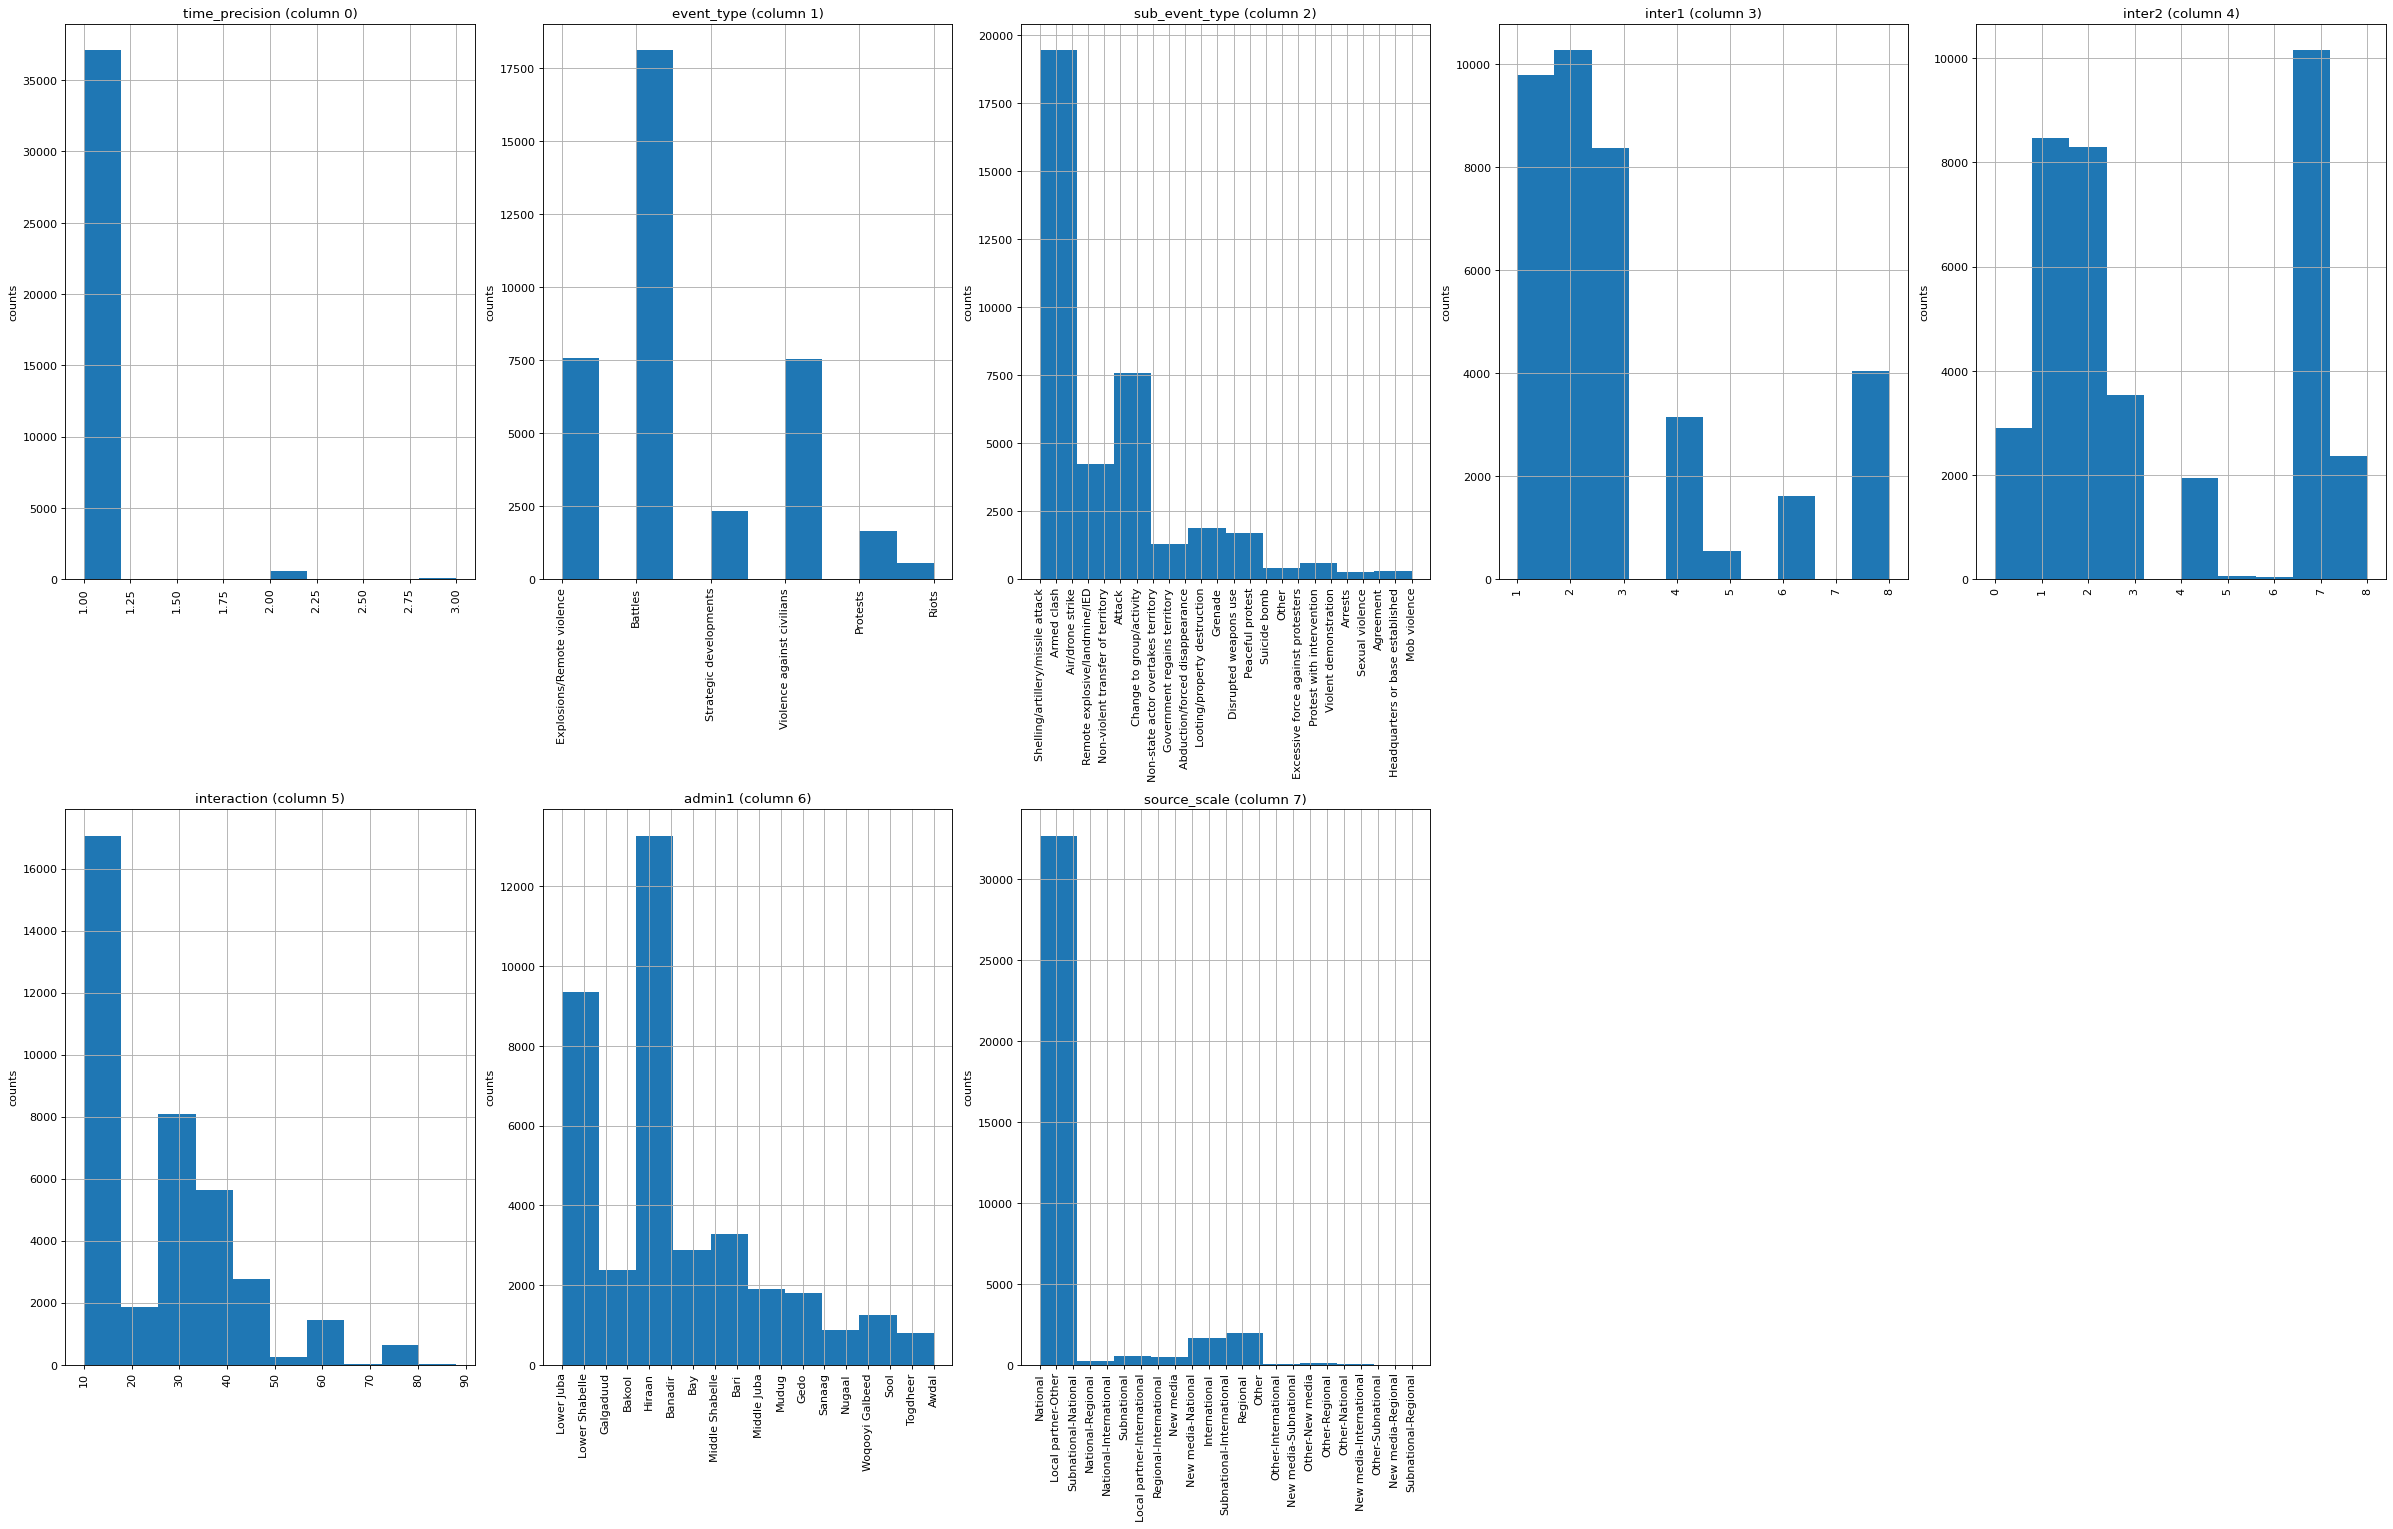

In [18]:
plotHistogram(data, 10, 5)

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


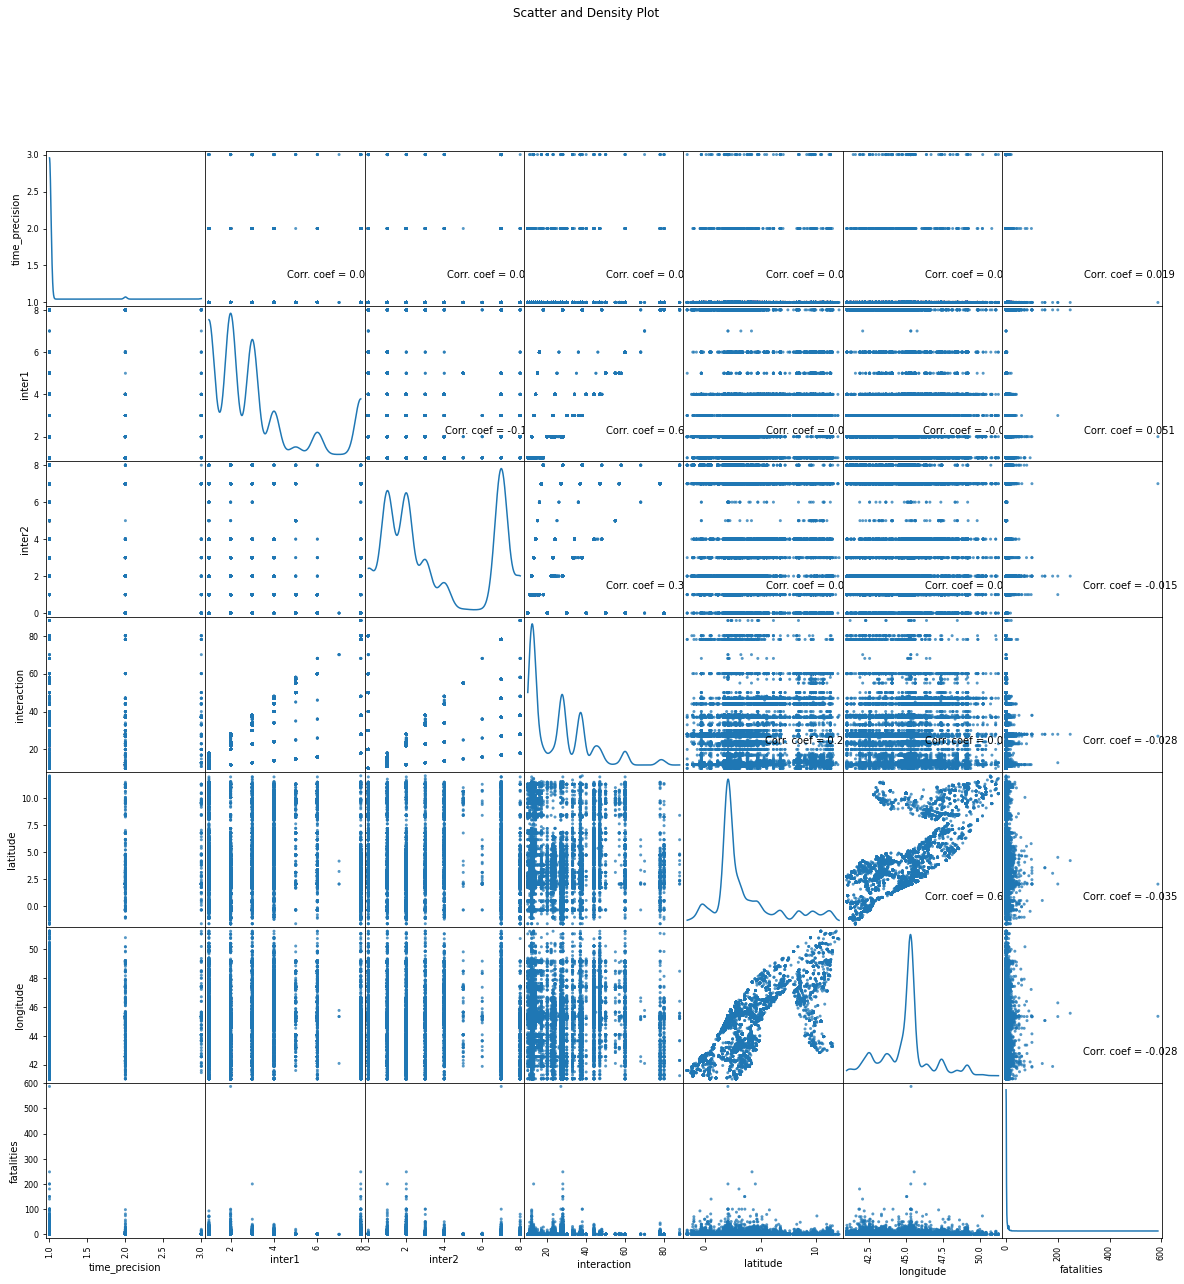

In [20]:
plotScatterMatrix(data, 20, 10)

In [28]:
# SELF-EXPLORATION
# NOTE : Maybe this is not required currently I just wanted to visualize the data geographically for the fatalities
# Graph showing the regions with fatalities with hover-around feature
fig = px.scatter_geo(df,lat='latitude',lon='longitude',hover_name='fatalities')
fig.update_layout(title = 'Conflict data of Somalia - 1997-2022', title_x=1)
fig.show()